## 1. Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import os
import random

## 2. Load Data

In [2]:
# Susenas 2012
sus12_ki = pd.read_csv('susenas12/sn12_ki.csv')

In [3]:
sus12_ki

,URUT,B1R1,B1R2,B1R5,B1R8,NART,HB,JK,UMUR,KWN,...,B5R34C2,B5R34C3,B5R35,B5R36,B5R37,B5R38,B5R38L,KABU,EXP_CAP,WEIND
0,110112500101601,11,1,1,1,1,1,1,41,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
1,110112500101601,11,1,1,1,2,2,2,30,2,...,0.0,0.0,1.0,4.0,NaN,NaN,NaN,1101,3.434643e+05,45.876255
2,110112500101601,11,1,1,1,3,3,2,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
3,110112500101601,11,1,1,1,4,3,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,3.434643e+05,45.876255
4,110112500101602,11,1,1,2,1,1,1,35,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101,5.703095e+05,55.252186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114440,947122001103810,94,71,2,10,2,2,2,37,2,...,0.0,0.0,3.0,NaN,1.0,NaN,NaN,9471,1.348310e+06,6.000000
1114441,947122001103810,94,71,2,10,3,3,1,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000
1114442,947122001103810,94,71,2,10,4,3,2,9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000
1114443,947122001103810,94,71,2,10,5,7,2,46,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9471,1.348310e+06,6.000000


Liat summary stats dari data konsumsi Susenas 2012

In [4]:
sus12_ki.describe()

,URUT,B1R1,B1R2,B1R5,B1R8,NART,HB,JK,UMUR,KWN,...,B5R34C1,B5R34C2,B5R34C3,B5R35,B5R36,B5R37,B5R38,KABU,EXP_CAP,WEIND
count,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,...,317791.000000,317791.000000,317791.000000,317790.000000,126049.000000,191740.000000,158190.000000,1.114445e+06,1.114445e+06,1.114445e+06
mean,4.250205e+14,4.228051e+01,2.197639e+01,1.571149e+00,5.453136e+00,2.836262e+00,2.583223e+00,1.498904e+00,2.924639e+01,1.642251e+00,...,0.185078,0.149428,0.334506,1.910985,4.526898,2.574319,2.363095,4.250027e+03,6.414489e+05,2.199646e+02
std,2.471679e+14,2.474286e+01,2.653410e+01,4.949122e-01,2.857661e+00,1.703301e+00,1.413839e+00,4.999990e-01,1.997500e+01,7.380006e-01,...,0.562494,0.503886,0.879598,0.834479,1.415119,0.770995,2.014585,2.471674e+03,7.558085e+05,2.081108e+02
min,1.101125e+14,1.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.101000e+03,6.707492e+04,1.000000e+00
25%,1.805125e+14,1.800000e+01,4.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01,1.000000e+00,...,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,1.000000,1.805000e+03,3.033944e+05,8.018752e+01
50%,3.507220e+14,3.500000e+01,9.000000e+00,2.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,2.700000e+01,2.000000e+00,...,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,1.000000,3.507000e+03,4.572752e+05,1.457933e+02
75%,6.311220e+14,6.300000e+01,2.400000e+01,2.000000e+00,8.000000e+00,4.000000e+00,3.000000e+00,2.000000e+00,4.400000e+01,2.000000e+00,...,0.000000,0.000000,0.000000,3.000000,6.000000,3.000000,4.000000,6.311000e+03,7.398477e+05,2.941666e+02
max,9.471220e+14,9.400000e+01,7.900000e+01,2.000000e+00,1.000000e+01,3.000000e+01,9.000000e+00,2.000000e+00,9.800000e+01,4.000000e+00,...,13.000000,11.000000,16.000000,3.000000,10.000000,3.000000,6.000000,9.471000e+03,7.529981e+07,4.941000e+03


# Choosing Relevant Variables

Dalam konteks project lab ini, kita akan melihat dan memvisualisasikan secara sederhana faktor-faktor yang memengaruhi akses masyarakat terhadap penggunaan alat KB. Beberapa variabel yang mungkin berpengaruh adalah:

1. Pengeluaran (hipotesis: semakin tinggi pengeluaran, lebih banyak memakai alat KB)
2. Tempat tinggal (hipotesis: daerah perkotaan lebih banyak memakai alat KB, tinggal di Jawa-Bali lebih mungkin pakai KB)
3. Tingkat pendidikan (hipotesis: semakin tinggi tingkat pendidikan, semakin banyak memakai alat KB)
4. Umur (hipotesis: Makin muda orang, makin tinggi kesadaran menggunakan KB. (atau) Rentang usia 24-30 makin tinggi kesadaran menggunakan KB.)
5. Pekerjaan (wanita yang bekerja kemungkinan lebih memakai KB dibanding yang tidak)
6. Keinginan punya anak (wanita yang ingin memiliki anak akan menunda penggunaan KB dibanding yang tidak ingin memiliki anak)

In [63]:
df_kb = sus12_ki[["URUT", "JK", "UMUR", "KWN", "B1R1", "B1R2","B1R5", "B5R17", "B5R20", "B5R24A1", "B5R30","B5R32",
                  "B5R33", "B5R35", "B5R36", "B5R37", "B5R38","EXP_CAP", "WEIND"]]

In [64]:
# Bikin District Identifier, bps_2009
df_kb = df_kb.assign(bps_2009 = df_kb["B1R1"]*100 + df_kb["B1R2"])
df_kb.head()

,URUT,JK,UMUR,KWN,B1R1,B1R2,B1R5,B5R17,B5R20,B5R24A1,B5R30,B5R32,B5R33,B5R35,B5R36,B5R37,B5R38,EXP_CAP,WEIND,bps_2009
0,110112500101601,1,41,2,11,1,1,8.0,2.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,343464.285714,45.876255,1101
1,110112500101601,2,30,2,11,1,1,8.0,2.0,2.0,NaN,23.0,7.0,1.0,4.0,NaN,NaN,343464.285714,45.876255,1101
2,110112500101601,2,5,1,11,1,1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343464.285714,45.876255,1101
3,110112500101601,1,0,1,11,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343464.285714,45.876255,1101
4,110112500101602,1,35,2,11,1,1,5.0,2.0,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,570309.523810,55.252186,1101


In [77]:
# Rubah dulu nama kolom agar lebih intuitif
df_kb.rename(columns={"B5R24A1": "status_kerja",
                      "B5R30": "bidang_kerja_utama",
                      "B5R32": "umur_nikah_pertama",
                     "B5R35": "status_pakai_kb",
                      "B5R36": "alat_kb",
                      "B5R37": "ingin_punya_anak",
                      "B5R38": "alasan_tidak_kb",
                     "EXP_CAP": "pengeluaran"}, inplace=True)

df_kb.head()

,URUT,JK,UMUR,KWN,B1R1,B1R2,B1R5,B5R17,B5R20,status_kerja,bidang_kerja_utama,umur_nikah_pertama,B5R33,status_pakai_kb,alat_kb,ingin_punya_anak,alasan_tidak_kb,pengeluaran,WEIND,bps_2009
0,110112500101601,1,41,2,11,1,1,8.0,2.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,343464.285714,45.876255,1101
1,110112500101601,2,30,2,11,1,1,8.0,2.0,2.0,NaN,23.0,7.0,1.0,4.0,NaN,NaN,343464.285714,45.876255,1101
2,110112500101601,2,5,1,11,1,1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343464.285714,45.876255,1101
3,110112500101601,1,0,1,11,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343464.285714,45.876255,1101
4,110112500101602,1,35,2,11,1,1,5.0,2.0,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,570309.523810,55.252186,1101


Oh jadi ada data kosong ya? Well let's see what we can do about those

In [78]:
total = df_kb.isnull().sum().sort_values(ascending=False)
percent = (df_kb.isnull().sum() / df_kb.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
alat_kb,988396,0.886895
alasan_tidak_kb,956255,0.858055
ingin_punya_anak,922705,0.827950
status_pakai_kb,796655,0.714845
B5R33,796654,0.714844
umur_nikah_pertama,796654,0.714844
bidang_kerja_utama,590171,0.529565
status_kerja,221506,0.198759
B5R17,190644,0.171066
B5R20,102718,0.092170


Oalah jadi ada banyak data kosong di umur_nikah_pertama, status pakai KB, alat KB, ingin_punya anak, sama bidang_kerja_utama T___T? Gimana nih? Lumayan gede missing data 50% ke atas. Apa di imputasi kah? Atau cari variabel lain?

In [79]:
df_kb["status_pakai_kb"].count()

317790

In [80]:
df_kb["alat_kb"].count()

126049

In [81]:
df_kb["ingin_punya_anak"].count()

191740

In [82]:
df_kb["JK"].count()

1114445

In [83]:
df_kb["JK"].value_counts()

1    558444
2    556001
Name: JK, dtype: int64

In [84]:
df_kb.groupby("JK")["status_pakai_kb"].agg(["count"])

,count
JK,
1,0
2,317790


In [85]:
df_kb.groupby("JK")["alat_kb"].agg(["count"])

,count
JK,
1,0
2,126049


In [86]:
df_kb.groupby("JK")["ingin_punya_anak"].agg(["count"])

,count
JK,
1,0
2,191740


Oh kebanyakan responden di survei ini justru ga pengen punya anak lagi ya

Oh ternyata KB tuh pertanyaan yang khusus ditujukan buat wanita. Huh, dan ternyata jumlah wanita yang ditanya pakai KB jenis apa lebih dikit dibanding status KB dan keinginan punya anak. 

In [87]:
df_kb.groupby("JK")["bidang_kerja_utama"].agg(["count"])

,count
JK,
1,318872
2,205402


Status kerja lebih banyak terisi dibanding yang wanita, tapi anehnya ga diimbangi data di bidang kerja. Apa karena di Indo lebih banyak pekerja informal ya?

Yuk cek persentase missing data per total wanita yang masuk dalam survei

In [26]:
df_kb.groupby("jenis_kelamin")["status_pakai_kb"].count()

jenis_kelamin
1         0
2    317790
Name: status_pakai_kb, dtype: int64

In [27]:
df_kb.groupby("jenis_kelamin")["alat_kb"].count()

jenis_kelamin
1         0
2    126049
Name: alat_kb, dtype: int64

In [28]:
df_kb.groupby("jenis_kelamin")["ingin_punya_anak"].count()

jenis_kelamin
1         0
2    191740
Name: ingin_punya_anak, dtype: int64

In [29]:
317790 / 556001 # status_kb bagi jumlah responden wanita

0.5715637202091363

In [30]:
126049 / 556001 # alat_kb bagi jumlah responden wanita

0.22670642678700217

In [31]:
191740 / 556001 # ingin_punya_anak bagi jumlah responden wanita

0.34485549486421785

In [32]:
448785 / 556001 # status_kerja bagi jumlah responden wanita

0.807165814449974

In [29]:
205402 / 556001 # responden bidang_kerja_utama yang wanita bagi jumlah responden wanita

0.36942739311619943

Oh jadi dari missing data yang paling dikit sampe paling banyak tuh status_kerja 80.7%, diikuti data status KB yang keisi sekitar 57 persen dari total wanita yang disurvei, terus diikuti bidang_kerja_utama (36%), ingin_punya_anak (34%), dan alat KB cuman 22 persen

Kalo kata ini sih https://www.sciencedirect.com/science/article/pii/S0895435618308710 :

Statistical guidance articles have stated that bias is likely in analyses with more than 10% missingness and that if more than 40% data are missing in important variables then results should only be considered as hypothesis generating [18], [19].

Jadi anggap hypothesis generating variable aja kali ya si status_pakai_kb ama alat kb nih. Bolehkah take them as they are?

Di satu sisi sih data-data yang lain yang rencananya bakal di jadiin independent variables aman sentosa dari missing data. Paling si Data pendidikan yang perlu di impute ato di drop

In [29]:
missing_data

,Total,Percent
alat_kb,988396,0.886895
alasan_tidak_kb,956255,0.858055
ingin_punya_anak,922705,0.827950
status_pakai_kb,796655,0.714845
umur_nikah_pertama,796654,0.714844
B5R33,796654,0.714844
B5R17,190644,0.171066
B5R20,102718,0.092170
WEIND,0,0.000000
pengeluaran,0,0.000000


Sekarang mau ubek-ubek datanya dulu

In [30]:
df_kb["status_pakai_kb"].value_counts()

1.0    126050
3.0     97762
2.0     93978
Name: status_pakai_kb, dtype: int64

In [31]:
df_kb["status_pakai_kb"].value_counts(normalize=True, sort = True)

1.0    0.396646
3.0    0.307631
2.0    0.295724
Name: status_pakai_kb, dtype: float64

Interpetasi variabel
1. Sedang menggunakan KB
2. Tidak menggunakan lagi
3. Tidak pernah menggunakan

Jadi kebanyakan sekitar 39% status kb wanita di Susenas pakai KB, sedangkan ga pernah pakai KB ama tidak menggunakan lagi hampirt berimbangan persentase nya. Menarik juga ya.

In [32]:
df_kb["alat_kb"].value_counts()

4.0     70870
6.0     29842
5.0      8364
3.0      8258
1.0      4085
10.0     2766
7.0      1014
2.0       709
9.0        96
8.0        45
Name: alat_kb, dtype: int64

In [33]:
df_kb["alat_kb"].value_counts(normalize=True, sort = True)

4.0     0.562242
6.0     0.236749
5.0     0.066355
3.0     0.065514
1.0     0.032408
10.0    0.021944
7.0     0.008044
2.0     0.005625
9.0     0.000762
8.0     0.000357
Name: alat_kb, dtype: float64

Interpretasi alat_kb:
1. Tubektomi
2. Vasektomi
3. Intra Uterine Device / Spiral
4. Suntik KB
5. Implan KB / Susuk KB
6. Pil KB
7. Kondom
8. Intervag/ tissue (diafragma)
9. Kondom Wanita
10. Cara Tradisional (hitung masa subur ato buang di luar / coitus interruptus)

Huh tidak intuitif ya, Pil KB yang lebih terjangkau sama simpel penggunaan nya (harus telaten minum nya sih, sebanyak 21-35 kapsul) ga dipake sebanyak suntik KB.

Suntik KB itungan nya risky sih, soalnya kalo mau balik normal lagi siklus mens rentang nya 6 bulan sampe satu tahun

So apa praktis nya suntik KB trumps all consideration despite its drawback?

Man kinda wish I had done this back in med school

In [35]:
df_kb.groupby("UMUR")["status_pakai_kb"].agg(["count"])

,count
UMUR,
0,0
1,0
2,0
3,0
4,0
...,...
94,37
95,76
96,40


In [36]:
df_kb.groupby("UMUR")["status_pakai_kb"].value_counts(sort=True)

UMUR  status_pakai_kb
11    3.0                  1
12    3.0                  4
13    1.0                  3
      3.0                  3
      2.0                  1
                        ... 
97    3.0                 39
      2.0                  4
      1.0                  1
98    3.0                213
      2.0                 30
Name: status_pakai_kb, Length: 249, dtype: int64

Yah susah dapat data yang berguna, apa harus di bikin kolom khusus buat kelompok usia ya?

In [40]:
df_kb.head()

,Urut,jenis_kelamin,umur,status_kawin,Provinsi_tinggal,kota_atau_desa,ijazah_tertinggi,status_kerja,bidang_kerja_utama,umur_nikah_pertama,status_pakai_kb,alat_kb,ingin_punya_anak,alasan_tidak_kb,pengeluaran,WEIND,bps_2009
0,110112500101601,1,41,2,11,1,8.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,343464.285714,45.876255,1101
1,110112500101601,2,30,2,11,1,8.0,2.0,NaN,23.0,1.0,4.0,NaN,NaN,343464.285714,45.876255,1101
2,110112500101601,2,5,1,11,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343464.285714,45.876255,1101
3,110112500101601,1,0,1,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343464.285714,45.876255,1101
4,110112500101602,1,35,2,11,1,5.0,1.0,11.0,NaN,NaN,NaN,NaN,NaN,570309.523810,55.252186,1101


In [91]:
df_kb = df_kb.assign(kelompok_usia= ["kel_90" if UMUR >=90 
                                         else "kel_80" if UMUR >= 80 
                                         else "kel_70" if UMUR >= 70 
                                         else "kel_60" if UMUR >= 60 
                                         else "kel_50" if UMUR >= 50 
                                         else "kel_40" if UMUR >= 40 
                                         else "kel_30" if UMUR >= 30 
                                         else "kel_20" if UMUR >= 20 
                                         else "kel_10" for UMUR in df_kb["UMUR"]])

df_kb

,URUT,JK,UMUR,KWN,B1R1,B1R2,B1R5,B5R17,B5R20,status_kerja,...,umur_nikah_pertama,B5R33,status_pakai_kb,alat_kb,ingin_punya_anak,alasan_tidak_kb,pengeluaran,WEIND,bps_2009,kelompok_usia
0,110112500101601,1,41,2,11,1,1,8.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.434643e+05,45.876255,1101,kel_40
1,110112500101601,2,30,2,11,1,1,8.0,2.0,2.0,...,23.0,7.0,1.0,4.0,NaN,NaN,3.434643e+05,45.876255,1101,kel_30
2,110112500101601,2,5,1,11,1,1,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.434643e+05,45.876255,1101,kel_10
3,110112500101601,1,0,1,11,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.434643e+05,45.876255,1101,kel_10
4,110112500101602,1,35,2,11,1,1,5.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.703095e+05,55.252186,1101,kel_30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114440,947122001103810,2,37,2,94,71,2,8.0,1.0,1.0,...,25.0,12.0,3.0,NaN,1.0,NaN,1.348310e+06,6.000000,9471,kel_30
1114441,947122001103810,1,10,1,94,71,2,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.348310e+06,6.000000,9471,kel_10
1114442,947122001103810,2,9,1,94,71,2,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.348310e+06,6.000000,9471,kel_10
1114443,947122001103810,2,46,1,94,71,2,5.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.348310e+06,6.000000,9471,kel_40


In [92]:
df_kb.groupby("kelompok_usia")["status_pakai_kb"].value_counts(normalize=True, sort=True)

kelompok_usia  status_pakai_kb
kel_10         3.0                0.545161
               1.0                0.380645
               2.0                0.074194
kel_20         1.0                0.587118
               3.0                0.254356
               2.0                0.158526
kel_30         1.0                0.628807
               2.0                0.198391
               3.0                0.172803
kel_40         1.0                0.447459
               2.0                0.324007
               3.0                0.228535
kel_50         2.0                0.543331
               3.0                0.373312
               1.0                0.083356
kel_60         3.0                0.563788
               2.0                0.420373
               1.0                0.015839
kel_70         3.0                0.729047
               2.0                0.266340
               1.0                0.004613
kel_80         3.0                0.812858
               2.0     

Woh, jadi dari sini bisa dapat hal yang berguna. Pengguna KB (1) banyak di kel_20, kel_30, dan kel_40. Terus ada trend yang menarik juga. Makin tua usia wanita (usia >= 60 )di sini (kalo data nya bener) makin gede orang yang ga pernah gunakan KB (3)

Sekarang mo coba pengelompokan pemakaian alat_kb berdasarkan umur

In [93]:
df_kb.groupby("kelompok_usia")["alat_kb"].value_counts(normalize = True, sort=True)

kelompok_usia  alat_kb
kel_10         4.0        0.722155
               6.0        0.200363
               5.0        0.040557
               3.0        0.024213
               10.0       0.007869
                            ...   
kel_80         2.0        0.166667
               6.0        0.166667
kel_90         2.0        0.333333
               4.0        0.333333
               5.0        0.333333
Name: alat_kb, Length: 71, dtype: float64

In [94]:
df_kb

,URUT,JK,UMUR,KWN,B1R1,B1R2,B1R5,B5R17,B5R20,status_kerja,...,umur_nikah_pertama,B5R33,status_pakai_kb,alat_kb,ingin_punya_anak,alasan_tidak_kb,pengeluaran,WEIND,bps_2009,kelompok_usia
0,110112500101601,1,41,2,11,1,1,8.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.434643e+05,45.876255,1101,kel_40
1,110112500101601,2,30,2,11,1,1,8.0,2.0,2.0,...,23.0,7.0,1.0,4.0,NaN,NaN,3.434643e+05,45.876255,1101,kel_30
2,110112500101601,2,5,1,11,1,1,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.434643e+05,45.876255,1101,kel_10
3,110112500101601,1,0,1,11,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.434643e+05,45.876255,1101,kel_10
4,110112500101602,1,35,2,11,1,1,5.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.703095e+05,55.252186,1101,kel_30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114440,947122001103810,2,37,2,94,71,2,8.0,1.0,1.0,...,25.0,12.0,3.0,NaN,1.0,NaN,1.348310e+06,6.000000,9471,kel_30
1114441,947122001103810,1,10,1,94,71,2,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.348310e+06,6.000000,9471,kel_10
1114442,947122001103810,2,9,1,94,71,2,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.348310e+06,6.000000,9471,kel_10
1114443,947122001103810,2,46,1,94,71,2,5.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.348310e+06,6.000000,9471,kel_40


Yah kebanyakan, gimana ya biar bisa liat satu persatu

In [95]:
alat_kb_usia = df_kb.groupby("kelompok_usia")["alat_kb"].value_counts(normalize = True, sort=True)
alat_kb_usia.describe()

count    71.000000
mean      0.126761
std       0.168189
min       0.000279
25%       0.007378
50%       0.046154
75%       0.213012
max       0.722155
Name: alat_kb, dtype: float64

Sekarang apa coba pakai bandingin Provinsi tinggal (B1R1) sama status_kb (B5R35) ya?

In [96]:
df_kb.groupby("B1R1")["status_pakai_kb"].value_counts(normalize=True)

B1R1  status_pakai_kb
11    3.0                0.397078
      1.0                0.348465
      2.0                0.254457
12    2.0                0.350257
      3.0                0.338537
                           ...   
91    1.0                0.307257
      2.0                0.242244
94    3.0                0.615158
      1.0                0.211042
      2.0                0.173799
Name: status_pakai_kb, Length: 99, dtype: float64

Terlalu luas, apa coba kota_atau_desa aja ya?

In [97]:
df_kb.groupby("B1R5")["status_pakai_kb"].value_counts(normalize=True)

B1R5  status_pakai_kb
1     1.0                0.399393
      2.0                0.332063
      3.0                0.268544
2     1.0                0.394620
      3.0                0.336440
      2.0                0.268940
Name: status_pakai_kb, dtype: float64

Huh, jadi di desa persentase orang yang ga pernah pake KB lebih banyak ya, walopun 33.6%

In [98]:
df_kb.groupby("B1R5")["alat_kb"].value_counts(normalize=True)

B1R5  alat_kb
1     4.0        0.514121
      6.0        0.244230
      3.0        0.104150
      5.0        0.046662
      1.0        0.045251
      10.0       0.023266
      7.0        0.014056
      2.0        0.006555
      9.0        0.001281
      8.0        0.000427
2     4.0        0.598138
      6.0        0.231169
      5.0        0.081046
      3.0        0.036693
      1.0        0.022827
      10.0       0.020957
      2.0        0.004931
      7.0        0.003560
      9.0        0.000374
      8.0        0.000305
Name: alat_kb, dtype: float64

Huh, baik di desa(2) maupun di kota(1) jenis KB yang paling banyak di pake KB suntik (4.0) by a wide margin.

Ternyata KB implan (5.0) lebih banyak di pake di desa (8%) dibanding di kota (4%). Di kota IUD/spiral(3.0) justru lebih banyak (10%) dibanding di desa (3%).

Apa karena faktor KB implan lebih terjangkau ya di desa?

Cari pake variabel ingin_punya_anak, status_kerja, dan bidang_kerja yuk

In [99]:
df_kb.groupby("ingin_punya_anak")["status_pakai_kb"].count()

ingin_punya_anak
1.0     33550
2.0     14520
3.0    143670
Name: status_pakai_kb, dtype: int64

In [100]:
df_kb.groupby("ingin_punya_anak")["status_pakai_kb"].value_counts(normalize=True, sort=True)

ingin_punya_anak  status_pakai_kb
1.0               3.0                0.590343
                  2.0                0.409657
2.0               3.0                0.540565
                  2.0                0.459435
3.0               2.0                0.512028
                  3.0                0.487972
Name: status_pakai_kb, dtype: float64

Interpretasi (masih) ingin_punya_anak :
1. Ya, segera(< 2 tahun)
2. Ya, nanti (> 2 tahun)
3. Tidak

Huh aneh ya, yang responden ingin_punya_anak pada ternyata cuman isi statusnya antara ga pernah pake (3.0) ato sedang tidak memakai(2.0). Kenapa ya?

In [101]:
df_kb.groupby("ingin_punya_anak")["alat_kb"].value_counts(normalize=True)

Series([], Name: alat_kb, dtype: float64)

Lah kok? Kenapa ya?

In [102]:
df_kb.groupby("status_kerja")["status_pakai_kb"].value_counts(normalize=True, sort=True)

status_kerja  status_pakai_kb
1.0           1.0                0.401461
              2.0                0.306488
              3.0                0.292051
2.0           1.0                0.391132
              3.0                0.325470
              2.0                0.283398
Name: status_pakai_kb, dtype: float64

Interpretasi status_kerja:
1. Ya (Bekerja)
2. Tidak bekerja

Hmm jadi, baik kerja maupun tidak tetap aja pakai KB ya. Perbedaannya paling di persentase yang tidak pernah menggunakan lebih tinggi pada wanita yang ga kerja walopun dikit sih bedanya (32% pada tidak vs 29% pada yang kerja)

In [103]:
df_kb.groupby("status_kerja")["alat_kb"].value_counts(normalize=True, sort=True)

status_kerja  alat_kb
1.0           4.0        0.540381
              6.0        0.228510
              3.0        0.076297
              5.0        0.072803
              1.0        0.037591
              10.0       0.028046
              7.0        0.008884
              2.0        0.006432
              9.0        0.000778
              8.0        0.000279
2.0           4.0        0.587934
              6.0        0.246432
              5.0        0.058778
              3.0        0.052841
              1.0        0.026317
              10.0       0.014772
              7.0        0.007058
              2.0        0.004677
              9.0        0.000742
              8.0        0.000449
Name: alat_kb, dtype: float64

Loh kok ga ada perbedaan dari status_kerja ama alat_kb yang digunakan? Ya sudahlah, mari kita coba bidang_kerja

In [104]:
df_kb.groupby("bidang_kerja_utama")["status_pakai_kb"].value_counts(normalize=True, sort=True)

bidang_kerja_utama  status_pakai_kb
1.0                 3.0                0.378056
                    1.0                0.323650
                    2.0                0.298294
2.0                 1.0                0.371301
                    3.0                0.357378
                    2.0                0.271321
3.0                 1.0                0.422148
                    2.0                0.292755
                    3.0                0.285097
4.0                 3.0                0.470588
                    1.0                0.311146
                    2.0                0.218266
5.0                 1.0                0.386632
                    3.0                0.311053
                    2.0                0.302315
6.0                 3.0                0.587127
                    1.0                0.221350
                    2.0                0.191523
7.0                 1.0                0.439353
                    2.0                0.285714
    

Dari semua bidang ini cuman di bidang perikanan (4) ya yang unik datanya, wanita yang ga pernah KB paling banyak hampirt mencapai setengahnya (47%).

Terus bidang terbanyak yang lakuin KB ada di bidang listrik/gas (9) sebanyak 55% diikuti sama bidang konstruksi/bangunan sebanyak 47%.

In [106]:
df_kb.groupby("B5R17")["status_pakai_kb"].value_counts(normalize=True, sort=True)

B5R17  status_pakai_kb
1.0    3.0                0.392692
       2.0                0.360100
       1.0                0.247207
2.0    1.0                0.444403
       2.0                0.305785
       3.0                0.249812
3.0    1.0                0.463524
       2.0                0.285616
       3.0                0.250860
4.0    1.0                0.393939
       2.0                0.343434
       3.0                0.262626
5.0    1.0                0.527191
       2.0                0.261206
       3.0                0.211603
6.0    1.0                0.557696
       2.0                0.244909
       3.0                0.197395
7.0    1.0                0.628676
       2.0                0.204044
       3.0                0.167279
8.0    1.0                0.507665
       2.0                0.270478
       3.0                0.221856
9.0    1.0                0.531948
       3.0                0.237331
       2.0                0.230721
10.0   1.0                0.5062

Huh, jadi di sini yang paling tinggi persentase penggunaan KB pada mereka yang medapat paket B(7.0) dan paket C (11.0) ya.

Data Viz

In [107]:
df_kb.describe()

,URUT,JK,UMUR,KWN,B1R1,B1R2,B1R5,B5R17,B5R20,status_kerja,bidang_kerja_utama,umur_nikah_pertama,B5R33,status_pakai_kb,alat_kb,ingin_punya_anak,alasan_tidak_kb,pengeluaran,WEIND,bps_2009
count,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,1.114445e+06,923801.000000,1.011727e+06,892939.000000,524274.000000,317791.000000,317791.000000,317790.000000,126049.000000,191740.000000,158190.000000,1.114445e+06,1.114445e+06,1.114445e+06
mean,4.250205e+14,1.498904e+00,2.924639e+01,1.642251e+00,4.228051e+01,2.197639e+01,1.571149e+00,4.203683,1.877406e+00,1.428843,8.145720,20.140665,21.045036,1.910985,4.526898,2.574319,2.363095,6.414489e+05,2.199646e+02,4.250027e+03
std,2.471679e+14,4.999990e-01,1.997500e+01,7.380006e-01,2.474286e+01,2.653410e+01,4.949122e-01,3.705277,3.279711e-01,0.494911,5.882204,4.268769,14.030970,0.834479,1.415119,0.770995,2.014585,7.558085e+05,2.081108e+02,2.471674e+03
min,1.101125e+14,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,6.707492e+04,1.000000e+00,1.101000e+03
25%,1.805125e+14,1.000000e+00,1.200000e+01,1.000000e+00,1.800000e+01,4.000000e+00,1.000000e+00,1.000000,2.000000e+00,1.000000,3.000000,17.000000,10.000000,1.000000,4.000000,2.000000,1.000000,3.033944e+05,8.018752e+01,1.805000e+03
50%,3.507220e+14,1.000000e+00,2.700000e+01,2.000000e+00,3.500000e+01,9.000000e+00,2.000000e+00,2.000000,2.000000e+00,1.000000,8.000000,20.000000,19.000000,2.000000,4.000000,3.000000,1.000000,4.572752e+05,1.457933e+02,3.507000e+03
75%,6.311220e+14,2.000000e+00,4.400000e+01,2.000000e+00,6.300000e+01,2.400000e+01,2.000000e+00,8.000000,2.000000e+00,2.000000,11.000000,22.000000,30.000000,3.000000,6.000000,3.000000,4.000000,7.398477e+05,2.941666e+02,6.311000e+03
max,9.471220e+14,2.000000e+00,9.800000e+01,4.000000e+00,9.400000e+01,7.900000e+01,2.000000e+00,15.000000,2.000000e+00,2.000000,19.000000,67.000000,86.000000,3.000000,10.000000,3.000000,6.000000,7.529981e+07,4.941000e+03,9.471000e+03


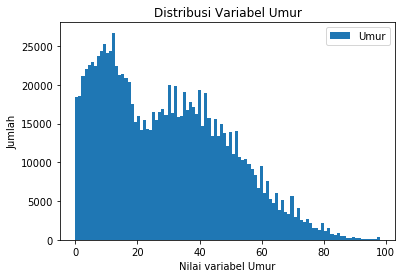

In [109]:
plot_umur = df_kb['UMUR']

plot_umur.plot.hist(grid=False, bins=99, rwidth=1, label='Umur')
plt.title("Distribusi Variabel Umur")
plt.xlabel("Nilai variabel Umur")
plt.ylabel("Jumlah")
plt.legend(loc="best")
plt.show()

In [111]:
df_kb = df_kb.assign(log_pengeluaran = np.log(df_kb["pengeluaran"]))
df_kb

,URUT,JK,UMUR,KWN,B1R1,B1R2,B1R5,B5R17,B5R20,status_kerja,...,B5R33,status_pakai_kb,alat_kb,ingin_punya_anak,alasan_tidak_kb,pengeluaran,WEIND,bps_2009,kelompok_usia,log_pengeluaran
0,110112500101601,1,41,2,11,1,1,8.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,3.434643e+05,45.876255,1101,kel_40,12.746838
1,110112500101601,2,30,2,11,1,1,8.0,2.0,2.0,...,7.0,1.0,4.0,NaN,NaN,3.434643e+05,45.876255,1101,kel_30,12.746838
2,110112500101601,2,5,1,11,1,1,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.434643e+05,45.876255,1101,kel_10,12.746838
3,110112500101601,1,0,1,11,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.434643e+05,45.876255,1101,kel_10,12.746838
4,110112500101602,1,35,2,11,1,1,5.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,5.703095e+05,55.252186,1101,kel_30,13.253935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114440,947122001103810,2,37,2,94,71,2,8.0,1.0,1.0,...,12.0,3.0,NaN,1.0,NaN,1.348310e+06,6.000000,9471,kel_30,14.114362
1114441,947122001103810,1,10,1,94,71,2,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,1.348310e+06,6.000000,9471,kel_10,14.114362
1114442,947122001103810,2,9,1,94,71,2,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.348310e+06,6.000000,9471,kel_10,14.114362
1114443,947122001103810,2,46,1,94,71,2,5.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,1.348310e+06,6.000000,9471,kel_40,14.114362


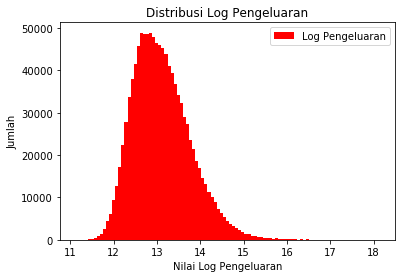

In [112]:
plot_exp = df_kb["log_pengeluaran"]

plot_exp.plot.hist(grid=False, bins=99, rwidth=1, color = "r", label="Log Pengeluaran")
plt.title("Distribusi Log Pengeluaran")
plt.xlabel("Nilai Log Pengeluaran")
plt.ylabel("Jumlah")
plt.legend(loc="best")
plt.show()

Dalam konteks project lab ini, kita akan melihat dan memvisualisasikan secara sederhana faktor-faktor yang memengaruhi akses masyarakat terhadap penggunaan alat KB. Beberapa variabel yang mungkin berpengaruh adalah:

1. Pengeluaran (hipotesis: semakin tinggi pengeluaran, lebih banyak memakai alat KB)
2. Tempat tinggal (hipotesis: daerah perkotaan lebih banyak memakai alat KB, tinggal di Jawa-Bali lebih mungkin pakai KB)
3. Tingkat pendidikan (hipotesis: semakin tinggi tingkat pendidikan, semakin banyak memakai alat KB)
4. Umur (hipotesis: penduduk yang lebih tua cenderung lebih mungkin memakai alat KB)
5. Pekerjaan (wanita yang bekerja kemungkinan lebih memakai KB dibanding yang tidak)
6. Keinginan punya anak

### Data Cleaning

1. Ubah pendidikan yang awalnya ijazah tertinggi yang didapat jadi lama pendidikan dalam tahun, berhubung kemungkinan efekt dari pendidikan terhadap pemakaian KB tidak linear
2. Populasi yang relevan di kasus ini sih wanita usia reproduktif (15-49 tahun)
3. Masukkan log pengeluaran ke df yang baru


In [113]:
# Ubah ijazah jadi lama pendidikan
ijazah = [(df_kb["B5R17"]==np.nan), (df_kb["B5R17"]==1), (df_kb["B5R17"]==2), (df_kb["B5R17"]==3),
             (df_kb["B5R17"]==4), (df_kb["B5R17"]==5), (df_kb["B5R17"]==6), (df_kb["B5R17"]==7), 
              (df_kb["B5R17"]==8), (df_kb["B5R17"]==9), ((df_kb["B5R17"]==10)), (df_kb["B5R17"]==11), 
              (df_kb["B5R17"]==12), (df_kb["B5R17"]==13), (df_kb["B5R17"]==14), (df_kb["B5R17"]==15)]

lama_didik = [0,3,6,6,6,9,9,9,12,12,12,12,14,15,16,18]

df_kb['lama_didik'] = np.select(ijazah, lama_didik)

In [114]:
# Ambil populasi yang di antara 17-52 tahun dan hanya perempuan
df_new = df_kb.copy()
df_new = df_kb.loc[(df_kb['UMUR'] >= 17) & (df_kb['UMUR'] <= 52)]

In [115]:
# Create Gender Status Variable
df_new.loc[df_new['JK']==1,'gender']=1
df_new.loc[df_new['JK']==2, 'gender']=0

/home/ade/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/ade/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/ade/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [116]:
# Create Dataset to Indicate Internet Access
df_new.loc[df_new['B5R20']==1,'inet_access']=1
df_new.loc[df_new['B5R20']==2,'inet_access']=0

/home/ade/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/ade/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/ade/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [118]:
# Variable Status Urbanisasi
df_new.loc[df_new['B1R5']==1, 'urban']=1
df_new.loc[df_new['B1R5']==2, 'urban']=0

/home/ade/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/ade/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/ade/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [119]:
# Create KB Status Variable
df_new.loc[df_new['status_pakai_kb']==1, 'sedang_kb']=1
df_new.loc[df_new['status_pakai_kb']==2, 'sedang_kb']=0
df_new.loc[df_new['status_pakai_kb']==3, 'sedang_kb']=0
df_new.loc[df_new['status_pakai_kb'].isna(), 'sedang_kb']=0

/home/ade/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/ade/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/ade/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [120]:
# Making NaN values into 0
df_new = df_new.fillna(0)

In [121]:
# Buat beberapa variabel memiliki tipe data integer
lst_2 = ['lama_didik', 'urban', 'sedang_kb', 'umur_nikah_pertama', 'gender', 'ingin_punya_anak',
        'alat_kb', 'alasan_tidak_kb', 'inet_access'] 
for column in lst_2:
    df_new[column] = df_new[column].astype(int)

In [122]:
# Transformasi EXP_CAP dengan log natural
df_new = df_new.assign(log_exp_cap = np.log(df_new["pengeluaran"]))


In [123]:
# Drop data yang tidak diperlukan
df_new = df_new.drop(columns=["JK","B1R1", "B1R2", "B1R5", "B5R17", 'B5R20', "status_pakai_kb"], axis=1)
df_new.head()

,URUT,UMUR,KWN,status_kerja,bidang_kerja_utama,umur_nikah_pertama,B5R33,alat_kb,ingin_punya_anak,alasan_tidak_kb,...,WEIND,bps_2009,kelompok_usia,log_pengeluaran,lama_didik,gender,inet_access,urban,sedang_kb,log_exp_cap
0,110112500101601,41,2,1.0,8.0,0,0.0,0,0,0,...,45.876255,1101,kel_40,12.746838,12,1,0,1,0,12.746838
1,110112500101601,30,2,2.0,0.0,23,7.0,4,0,0,...,45.876255,1101,kel_30,12.746838,12,0,0,1,1,12.746838
4,110112500101602,35,2,1.0,11.0,0,0.0,0,0,0,...,55.252186,1101,kel_30,13.253935,9,1,0,1,0,13.253935
5,110112500101602,33,2,2.0,0.0,22,11.0,4,0,0,...,55.252186,1101,kel_30,13.253935,6,0,0,1,1,13.253935
9,110112500101603,46,2,1.0,18.0,35,10.0,0,3,1,...,20.006414,1101,kel_40,14.082306,16,0,0,1,0,14.082306


In [124]:
df_clean = df_new.copy()

### Countplot Lama Pendidikan

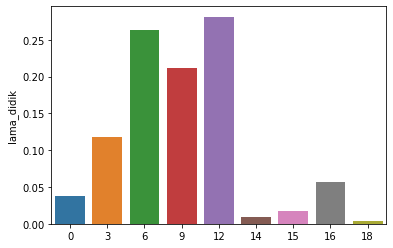

In [125]:
sns.barplot(x = df_clean['lama_didik'].value_counts().index, 
            y= df_clean['lama_didik'].value_counts(normalize=True))

### Countplot Status Urban

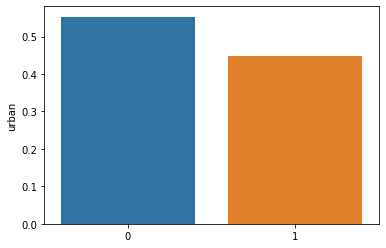

In [126]:
sns.barplot(x=df_clean['urban'].value_counts().index,
           y=df_clean['urban'].value_counts(normalize=True))

### Countplot Jenis Kelamin

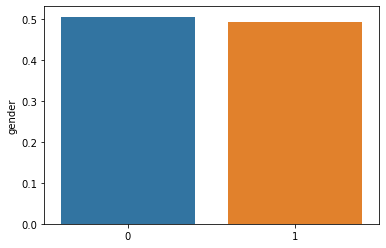

In [128]:
sns.barplot(x=df_clean['gender'].value_counts().index,
           y=df_clean['gender'].value_counts(normalize=True))

### Countplot Status KB

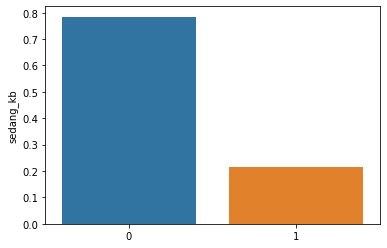

In [129]:
sns.barplot(x=df_clean['sedang_kb'].value_counts().index,
           y=df_clean['sedang_kb'].value_counts(normalize=True))

### Countplot Alat / Cara Pakai KB

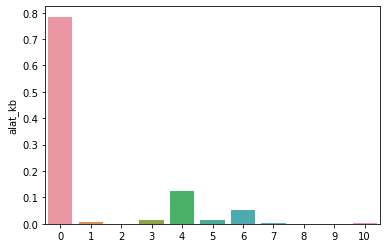

In [130]:
sns.barplot(x=df_clean['alat_kb'].value_counts().index,
           y=df_clean['alat_kb'].value_counts(normalize=True))

## Collapse to District Level

In [132]:
df_clean.columns

Index(['URUT', 'UMUR', 'KWN', 'status_kerja', 'bidang_kerja_utama',
       'umur_nikah_pertama', 'B5R33', 'alat_kb', 'ingin_punya_anak',
       'alasan_tidak_kb', 'pengeluaran', 'WEIND', 'bps_2009', 'kelompok_usia',
       'log_pengeluaran', 'lama_didik', 'gender', 'inet_access', 'urban',
       'sedang_kb', 'log_exp_cap'],
      dtype='object')

In [133]:
wt_mean = lambda x: np.average(x, weights=df_clean.loc[x.index, "WEIND"])
wt_sum = lambda x: np.sum(x, weights=df_clean.loc[x.index, "WEIND"])

wt_mean_annex = lambda x: np.average(x, weights=df_kb.loc[x.index, "WEIND"])

# Creating Collapsed Dataframe
df_group = df_clean.groupby("bps_2009").agg(pengeluaran=("pengeluaran",wt_mean),
                                            urban=("urban",wt_mean),
                                            inet_access=("inet_access",wt_mean),
                                            lama_didik=("lama_didik",wt_mean),
                                            sedang_kb=("sedang_kb",wt_mean),
                                            WEIND=("WEIND","sum"))

# Mean Age (Processed Differently)
df_grouped_annex = df_kb.groupby("bps_2009").agg(umur=("UMUR",wt_mean_annex))

# Creating Log Expenditure per Capita
df_group = df_group.assign(log_exp_cap=np.log(df_group['pengeluaran']))

# Merging Both

df_grouped = pd.concat([df_group,df_grouped_annex],axis=1)
df_grouped.head()

,pengeluaran,urban,inet_access,lama_didik,sedang_kb,WEIND,log_exp_cap,umur
bps_2009,,,,,,,,
1101,548299.250282,0.191834,0.079945,9.073848,0.167582,44155.419981,13.214576,25.911792
1102,543769.712959,0.242318,0.107465,7.990394,0.175978,55011.668988,13.206281,23.688448
1103,500785.813064,0.142933,0.070801,8.698804,0.167729,111649.619487,13.123934,27.707414
1104,436614.221166,0.168336,0.064455,9.366410,0.208089,94150.127113,12.986805,25.091750
1105,528470.697678,0.115460,0.056322,8.151657,0.172161,194314.029968,13.177743,25.421685


## Lama didik vs Status KB

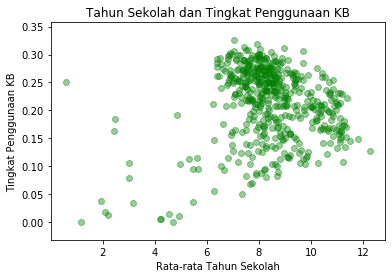

In [134]:
# Lama didik dan Status KB
x_sch = df_grouped["lama_didik"]
y_sch = df_grouped["sedang_kb"]

# Plot
plt.scatter(x_sch, y_sch, alpha=0.4, c='green')
plt.title('Tahun Sekolah dan Tingkat Penggunaan KB')
plt.xlabel('Rata-rata Tahun Sekolah')
plt.ylabel('Tingkat Penggunaan KB')
plt.rcParams['figure.figsize'] = [7,7]
plt.show()

Tingkat Urbanisasi vs Status KB

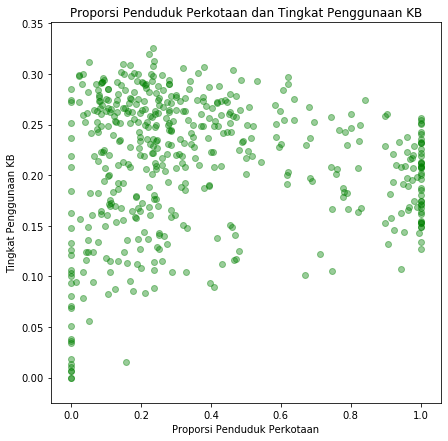

In [135]:
# Tingkat Urbanisasi
x_urb = df_grouped["urban"]
y_urb = df_grouped["sedang_kb"]

# Plot
plt.scatter(x_urb, y_urb, alpha=0.4, c='green')
plt.title('Proporsi Penduduk Perkotaan dan Tingkat Penggunaan KB')
plt.xlabel('Proporsi Penduduk Perkotaan')
plt.ylabel('Tingkat Penggunaan KB')
plt.rcParams['figure.figsize'] = [7,7]
plt.show()

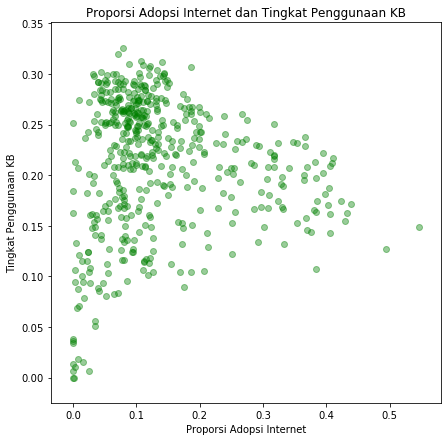

In [136]:
# Proporsi Adopsi Internet
x_int = df_grouped["inet_access"]
y_int = df_grouped["sedang_kb"]

# Plot
plt.scatter(x_int, y_int, alpha=0.4, c='green')
plt.title('Proporsi Adopsi Internet dan Tingkat Penggunaan KB')
plt.xlabel('Proporsi Adopsi Internet')
plt.ylabel('Tingkat Penggunaan KB')
plt.rcParams['figure.figsize'] = [7,7]
plt.show()

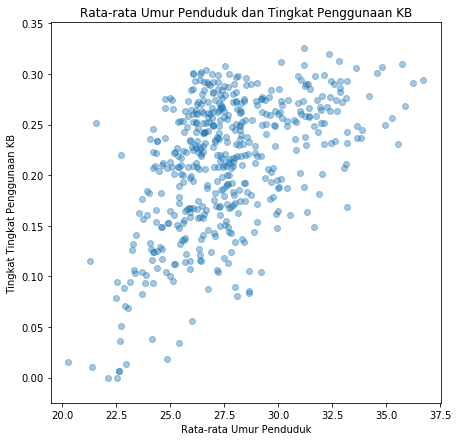

In [138]:
# Umur Penduduk
x_age = df_grouped["umur"]
y_age = df_grouped["sedang_kb"]

# Plot
plt.scatter(x_age, y_age, alpha=0.4)
plt.title('Rata-rata Umur Penduduk dan Tingkat Penggunaan KB')
plt.xlabel('Rata-rata Umur Penduduk')
plt.ylabel('Tingkat Tingkat Penggunaan KB')
plt.rcParams['figure.figsize'] = [7,7]
plt.show()